In [6]:
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#opening json
with open('tamid-final-project.json') as json_file:
    data = json.load(json_file)

#converting json to csv
activity_data = data['Activity Data for September 2021']
data_file = open('/Users/rohanpandit/TAMID Tech Edu/activity.csv', 'w')
csv_writer = csv.writer(data_file)
csv_writer.writerow(activity_data[0].keys())
for data in activity_data:
    csv_writer.writerow(data.values())
data_file.close()

In [7]:
#printing csv
df = pd.read_csv('activity.csv')
df

,Calories,Date,Minutes Exercised,Steps
0,1924,"September 1, 2021",167,15774
1,878,"September 2, 2021",86,14166
2,2135,"September 2, 2021",223,19176
3,593,"September 4, 2021",55,8970
4,843,"September 5, 2021",92,7000
5,355,"September 6, 2021",5,3769
6,1451,"September 7, 2021",121,14398
7,1483,"September 8, 2021",2483,19739
8,572,"September 9, 2021",53,9136
9,910,"September 10, 2021",80,6709


In [8]:
#cleaning data, since dataset is small, just picked outliers manually
df.drop(5, inplace=True)
df.drop(7, inplace=True)
df

,Calories,Date,Minutes Exercised,Steps
0,1924,"September 1, 2021",167,15774
1,878,"September 2, 2021",86,14166
2,2135,"September 2, 2021",223,19176
3,593,"September 4, 2021",55,8970
4,843,"September 5, 2021",92,7000
6,1451,"September 7, 2021",121,14398
8,572,"September 9, 2021",53,9136
9,910,"September 10, 2021",80,6709
10,605,"September 11, 2021",49,9102
11,855,"September 12, 2021",79,11056


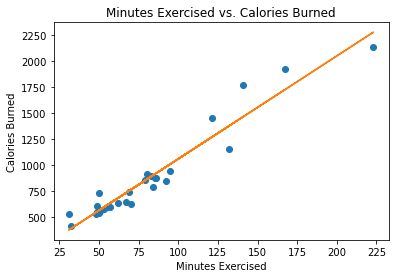

In [15]:
x = 'Minutes Exercised'
y = 'Calories'
plt.plot(x, y, data=df, linestyle='none', marker='o')
m, b = np.polyfit(df[x], df[y], 1)
plt.title('Minutes Exercised vs. Calories Burned')
plt.xlabel('Minutes Exercised')
plt.ylabel('Calories Burned')
plt.plot(df[x], m * df[x] + b)
plt.show()

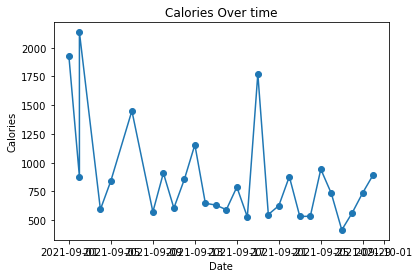

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace = True)
x=df['Date']
y = df['Calories']
plt.plot_date(x, y, linestyle = 'solid')
plt.title('Calories Over time')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.show()

In [12]:
y = df[['Calories']]
x = df[["Steps", "Minutes Exercised"]]
OLS = sm.OLS(y, x).fit()
print(OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:               Calories   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              927.7
Date:                Mon, 06 Dec 2021   Prob (F-statistic):                    6.70e-25
Time:                        18:57:35   Log-Likelihood:                         -172.33
No. Observations:                  28   AIC:                                      348.7
Df Residuals:                      26   BIC:                                      351.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [13]:
df.corr()

,Calories,Minutes Exercised,Steps
Calories,1.000000,0.964284,0.823827
Minutes Exercised,0.964284,1.000000,0.833735
Steps,0.823827,0.833735,1.000000


In [14]:
print("While both Steps and Minutes Exercised have a strong correlation to Calories, Minutes Exercised has a correlation that is closer to 1, so there is a stronger correlation between Minutes Exercised and Calories when compared to Steps and Calories")

While both Steps and Minutes Exercised have a strong correlation to Calories, Minutes Exercised has a correlation that is closer to 1, so there is a stronger correlation between Minutes Exercised and Calories when compared to Steps and Calories
